In [1]:
#comment
#obervations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [20]:
data=pd.read_csv("student.csv")

In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
72+72+74/3

168.66666666666666

In [26]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [28]:
data.shape

(1000, 8)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
data['gender'].dtypes

dtype('O')

In [34]:
data['gender'].dtypes=='O'

True

In [36]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [38]:
cat_col=[fea for fea in data.columns if data[fea].dtype == 'O']

In [40]:
num_col=[fea for fea in data.columns if data[fea].dtype != 'O']

In [42]:
data[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [44]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [46]:
data.memory_usage()

Index                           132
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## missing value

In [48]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [50]:
data.isnull().sum().sum()

0

In [52]:
data.duplicated().sum()

0

In [54]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [56]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [66]:
# Drop non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Now compute the correlation
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [70]:
# Drop non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Now compute the correlation
covariance_matrix = numeric_data.cov()
print(covariance_matrix)


               math score  reading score  writing score
math score     229.918998     180.998958     184.939133
reading score  180.998958     213.165605     211.786661
writing score  184.939133     211.786661     230.907992


In [72]:
numeric_data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

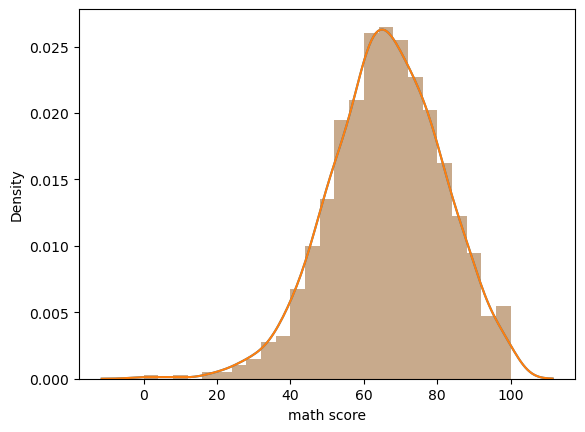

In [80]:
sns.distplot(data['math score'])
plt.show()

In [43]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [82]:
-data['Avarge']=(data['math score']+data['reading score']+data['writing score'])/3

In [84]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [89]:
data.groupby('gender').mean(numeric_only = True)

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [91]:
data.groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
gender,,,,,,,,
female,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482


In [ ]:
#question: you have to find out no of student whoever is having less than 30 marks math

In [93]:
data[data["math score"] < 30].count()


gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
Avarge                         14
dtype: int64

In [57]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Avarge'],
      dtype='object')

In [95]:
data_num=data[num_col]

In [97]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [99]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [101]:
data_num.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


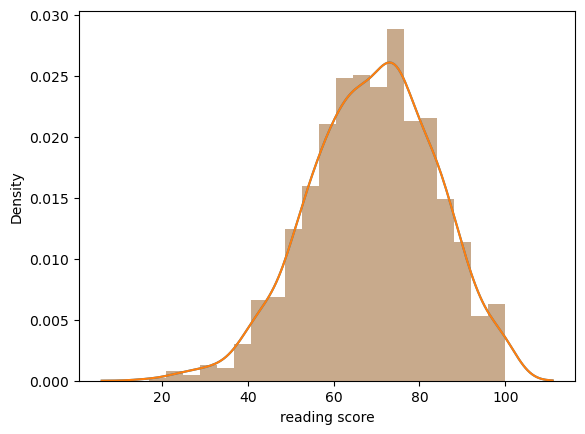

In [107]:
sns.distplot(data_num['reading score'])
plt.show()

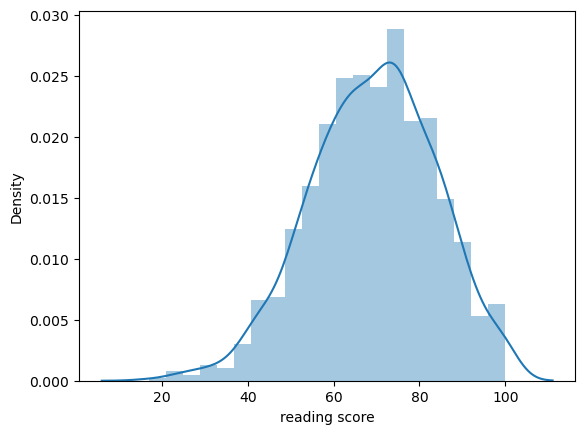

In [109]:
sns.distplot(data_num['reading score'])
plt.show()

In [ ]:
#outlier

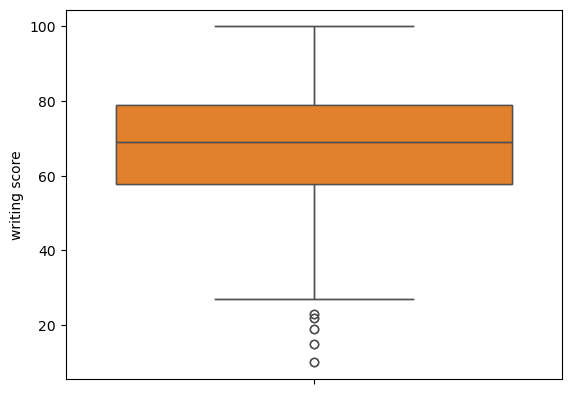

In [113]:
sns.boxplot(data=data['writing score'])
plt.show()

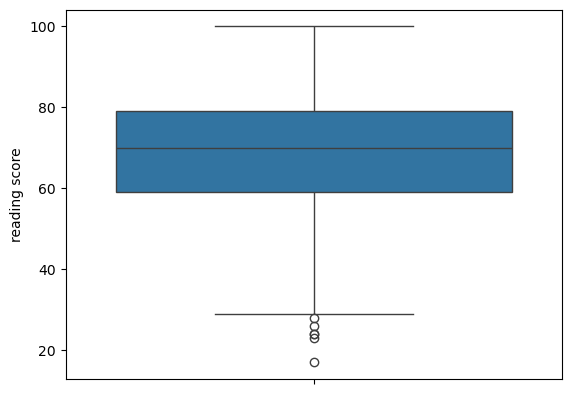

In [115]:
sns.boxplot(data=data['reading score'])
plt.show()

In [117]:
q1=data['math score'].quantile(0.25)

In [119]:
q3=data['math score'].quantile(0.75)

In [121]:
IQR=q3-q1

In [123]:
upper_limit=q3+(1.5*IQR)

In [125]:
upper_limit

107.0

In [127]:
lower_limit=q1-(1.5*IQR)

In [129]:
lower_limit

27.0

In [131]:
data_outlier=data[data['math score']<lower_limit]

In [133]:
data_num.drop(data_outlier.index)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [135]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [137]:
data[data['math score']>upper_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge


In [139]:
data['math score'].quantile(1.00)

100.0

In [141]:
data['math score'].min()

0

In [143]:
data['math score'].max()

100

In [145]:
data['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [147]:
data_num.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [149]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [205]:
def get_iqr(df, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5 * IQR
    lower_fence = q1 - 1.5 * IQR
    return IQR, upper_fence, lower_fence

In [207]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    iqr=q3-q1
    up_limit=q3+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [209]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        low_limit,upper_limit=outlier_threshold(data_num,variable)
        data.loc[data[variable]<low_limit,variable]=low_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit

In [211]:
replace_with_threshold(data_num,data_num.columns)

In [213]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


## graph analysis

In [151]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avarge
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


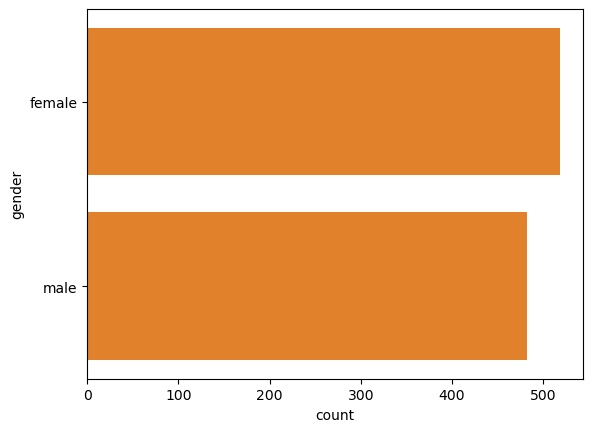

In [155]:
sns.countplot(data['gender'])
plt.show()

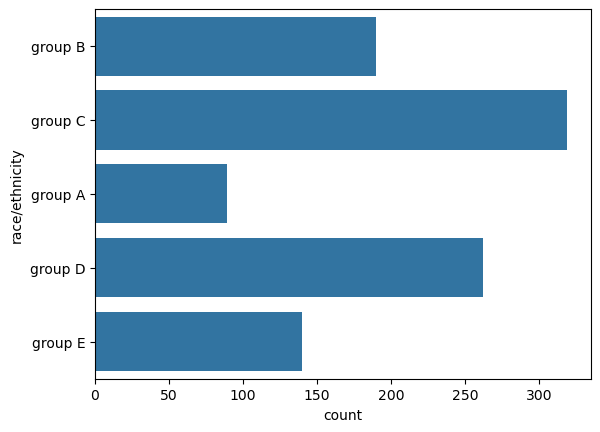

In [157]:
sns.countplot(data['race/ethnicity'])
plt.show()

In [161]:
df=data.groupby('gender').mean(numeric_only = True)


In [163]:
df

,math score,reading score,writing score,Avarge
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [165]:
df['Avarge'][0]

69.56949806949807

In [167]:
df['Avarge'][1]

65.8374827109267

In [169]:
df['math score'][0]

63.633204633204635

In [171]:
df['math score'][1]

68.72821576763485

In [181]:
female_score=df['Avarge'][0],df['math score'][0]

In [175]:
female_score

(69.56949806949807, 63.633204633204635)

In [183]:
male_score=df['Avarge'][1],df['math score'][1]

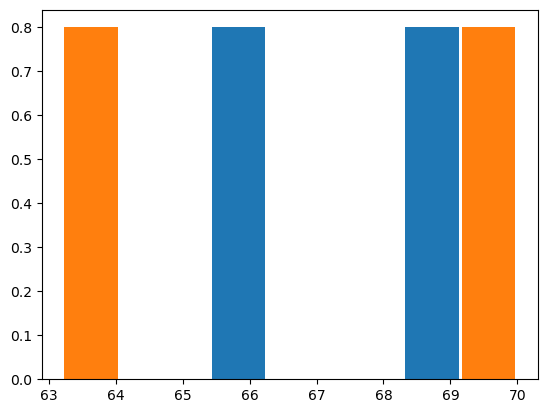

In [223]:
plt.bar(male_score,0.8,label='male')
plt.bar(female_score,0.8,label='female')
plt.show()

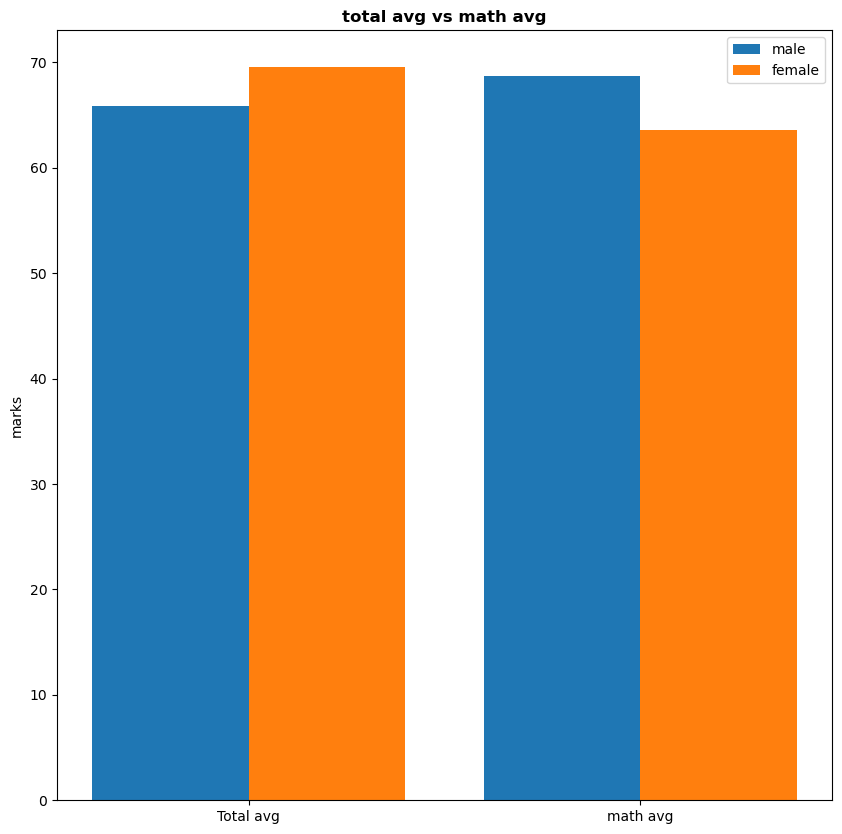

In [189]:
plt.figure(figsize=(10,10))
X=['Total avg','math avg']
female_score=df['Avarge'][0],df['math score'][0]
male_score=df['Avarge'][1],df['math score'][1]
X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_score,0.4,label='male')
plt.bar(X_axis+0.2,female_score,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("marks")
plt.title("total avg vs math avg",fontweight='bold')
plt.legend()
plt.show()

In [138]:
data_num.head()

,math score,reading score,writing score
0,72,72,74.0
1,69,79,79.0
2,77,79,79.0
3,47,57,44.0
4,76,78,75.0


In [191]:
data_num.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


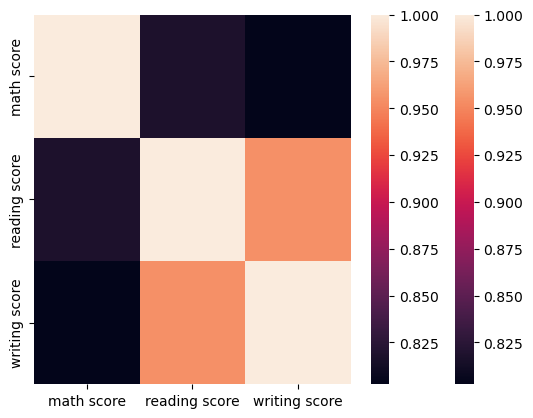

In [195]:
sns.heatmap(data_num.corr())
plt.show()

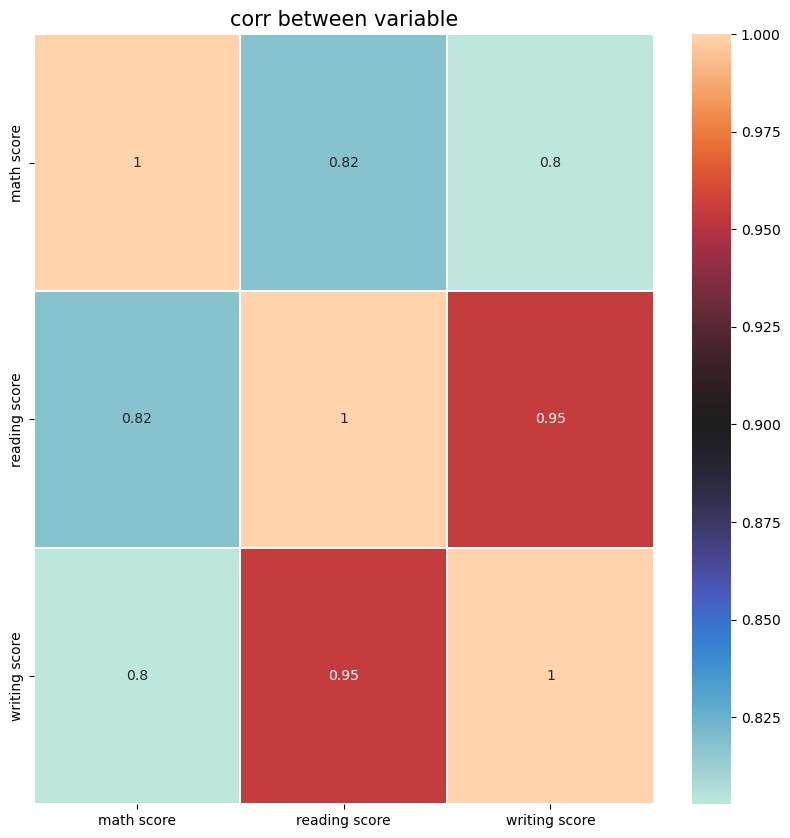

In [197]:
sns.heatmap(data_num.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title("corr between variable",color='black',size=15)
plt.show()

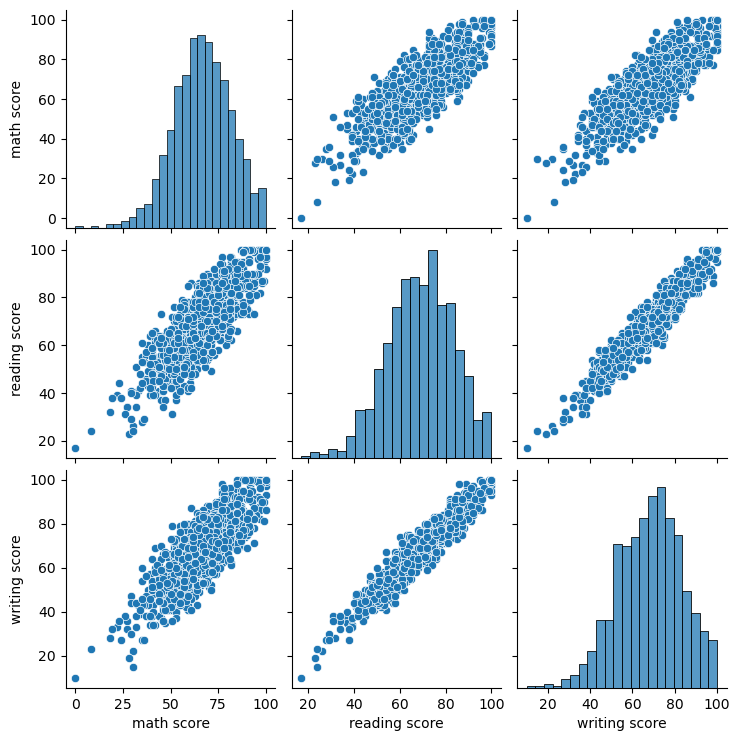

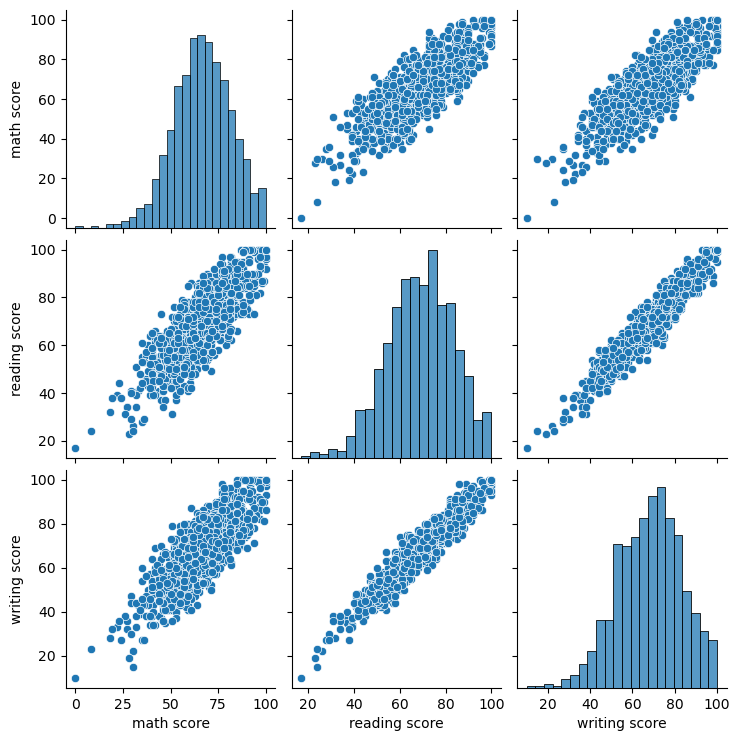

In [201]:
sns.pairplot(data_num)
plt.show()

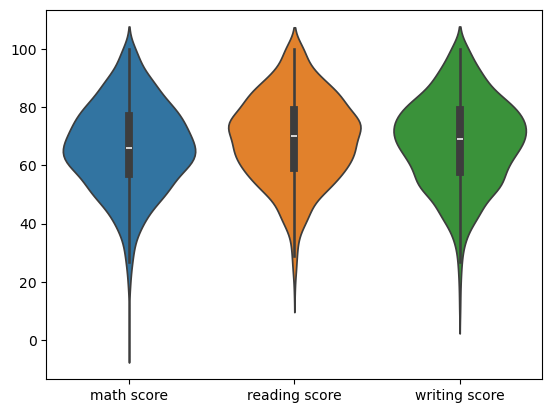

In [203]:
sns.violinplot(data=data_num)
plt.show()

In [147]:
10 dataset

pick anyone

perform detail EDA in one ipynb
perform missing value handle if it is there in one ipynb all the method(10-12)
perform outlier handle if it is there in one ipynb all the method(10-12)
perform encoding  if it is required in one ipynb all the method(10-12)
perform scaling one ipynb all the method(10-12)
perform feature selection in one ipynb all the method(10-12)
perform transformation one ipynb all the method(10-12)

SyntaxError: invalid syntax (Temp/ipykernel_10080/895118054.py, line 1)

In [155]:
scaler = StandardScaler()

In [156]:
scaler.fit(data_num)

StandardScaler()

In [157]:
scaler.transform(data_num)

array([[ 0.64111445,  0.41264193,  0.62435433],
       [ 0.39560215,  1.00503191,  1.02321994],
       [ 1.05030161,  1.00503191,  1.02321994],
       ...,
       [-0.42277218,  0.32801479, -0.09360379],
       [ 0.31376472,  0.92040477,  0.8636737 ],
       [ 1.05030161,  1.00503191,  1.02321994]])